# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [641]:
import pandas as pd 
import numpy as np
from sklearn.impute import KNNImputer


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [642]:
df=pd.read_csv("RTA_Dataset.csv")

In [643]:
col=df.columns
col

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [644]:
#Find the dataset information and observe the datatypes.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [645]:
#Check the shape of the data to understand its structure.
df.shape


(12316, 32)

In [646]:
#View the the data with various functions to get an initial sense of the data.
print("These are the first 5 rows of the dataset:")
df.head()

These are the first 5 rows of the dataset:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [647]:
print("These are the last 5 rows of the dataset:")
df.tail()

These are the last 5 rows of the dataset:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [648]:
print("This is a random row of the dataset:")
df.sample()

This is a random row of the dataset:


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
903,19:00:00,Wednesday,31-50,Unknown,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [649]:
print("This is a random row of the dataset but i vertical way :")
df.sample().transpose()

This is a random row of the dataset but i vertical way :


,2989
Time,6:08:00
Day_of_week,Tuesday
Age_band_of_driver,18-30
Sex_of_driver,Male
Educational_level,Junior high school
Vehicle_driver_relation,Employee
Driving_experience,Below 1yr
Type_of_vehicle,Other
Owner_of_vehicle,Owner
Service_year_of_vehicle,NaN


In [650]:
#Perform summary statistics on the dataset to grasp central tendencies and variability.
df.describe()
#it shows two columns beacause they are the only numrical columns in the data set

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [651]:
#Check for duplicated data.
df.duplicated().sum()

0

In [652]:
#Check for null values.
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [653]:
#put the columns with missing value in list to get to it faster 
col_Na=[
    "Educational_level","Vehicle_driver_relation","Driving_experience","Type_of_vehicle","Owner_of_vehicle","Service_year_of_vehicle",
    "Defect_of_vehicle","Area_accident_occured","Lanes_or_Medians","Road_allignment","Types_of_Junction","Road_surface_type",
    "Type_of_collision","Vehicle_movement","Work_of_casuality","Fitness_of_casuality"]



In [654]:
j=0
for i in range(16):
   
    print("\n",df[col_Na[j]].value_counts())
    j=1+j


 Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

 Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

 Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

 Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj       

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

**Handling Missing Values**

In [655]:
#Handling Missing Values:Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
col_Na

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

In [656]:
df[col_Na].isna().sum()

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

In [657]:
#this loop is for printing the values of each column in the col_na waich has null valuse to check if there is differnet value that could be conseder null such as unknowen 
j=0
for i in range(16):
   
    print("\n",df[col_Na[j]].value_counts())
    j=1+j


 Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64

 Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

 Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

 Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj       

In [658]:
#here i did replace the unknown values with null
df["Educational_level"].replace("Unknown",np.nan,inplace=True)#knn imputer 
df["Vehicle_driver_relation"].replace("Unknown",np.nan,inplace=True) #knn imputer 
df["Driving_experience"].replace("unknown",np.nan,inplace=True)#knn imputer 
df["Area_accident_occured"].replace("Unknown",np.nan,inplace=True)# mode()
df["Service_year_of_vehicle"].replace("Unknown",np.nan,inplace=True)#knn imputer 
df["Lanes_or_Medians"].replace("Unknown",np.nan,inplace=True)# mode()
df["Type_of_collision"].replace("Unknown",np.nan,inplace=True)# mode()
df["Vehicle_movement"].replace("Unknown",np.nan,inplace=True)#mode()
df["Work_of_casuality"].replace("Unknown",np.nan,inplace=True)#mode()
df["Age_band_of_driver"].replace("Unknown",np.nan,inplace=True)#mode()




In [659]:
df.shape

(12316, 32)

In [660]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver             1548
Sex_of_driver                     0
Educational_level               841
Vehicle_driver_relation         593
Driving_experience              862
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        6811
Defect_of_vehicle              4427
Area_accident_occured           261
Lanes_or_Medians                442
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               169
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                396
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [661]:
df.head().transpose()

,0,1,2,3,4
Time,17:02:00,17:02:00,17:02:00,1:06:00,1:06:00
Day_of_week,Monday,Monday,Monday,Sunday,Sunday
Age_band_of_driver,18-30,31-50,18-30,18-30,18-30
Sex_of_driver,Male,Male,Male,Male,Male
Educational_level,Above high school,Junior high school,Junior high school,Junior high school,Junior high school
Vehicle_driver_relation,Employee,Employee,Employee,Employee,Employee
Driving_experience,1-2yr,Above 10yr,1-2yr,5-10yr,2-5yr
Type_of_vehicle,Automobile,Public (> 45 seats),Lorry (41?100Q),Public (> 45 seats),NaN
Owner_of_vehicle,Owner,Owner,Owner,Governmental,Owner
Service_year_of_vehicle,Above 10yr,5-10yrs,NaN,NaN,5-10yrs


In [662]:
df.shape

(12316, 32)

In [663]:
#before we need to trnasform the data 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [664]:
ohe=OneHotEncoder(sparse_output=False)
le = LabelEncoder()

In [665]:
#encode the Service_year_of_vehicle with the one hot encoder 
encoded = ohe.fit_transform(df[['Service_year_of_vehicle']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Service_year_of_vehicle']))
df = pd.concat([df, encoded_df], axis= 1)
df.drop("Service_year_of_vehicle", axis=1, inplace=True)


In [666]:
#encode the Driving_experience with label encoder 
df['Driving_experience'] = le.fit_transform(df['Driving_experience'])


In [667]:
#here i did fill the null with the knn imputer 
df[['Driving_experience']] = fill_knn.fit_transform(df[['Driving_experience']])
df[['Service_year_of_vehicle_5-10yrs']] = fill_knn.fit_transform(df[['Service_year_of_vehicle_5-10yrs']])
df[['Service_year_of_vehicle_Above 10yr']] = fill_knn.fit_transform(df[['Service_year_of_vehicle_Above 10yr']])
df[['Service_year_of_vehicle_2-5yrs']] = fill_knn.fit_transform(df[['Service_year_of_vehicle_2-5yrs']])
df[['Service_year_of_vehicle_1-2yr']] = fill_knn.fit_transform(df[['Service_year_of_vehicle_1-2yr']])
df[['Service_year_of_vehicle_Below 1yr']] = fill_knn.fit_transform(df[['Service_year_of_vehicle_Below 1yr']])


18-30

-12

In [668]:
#fiil in with mode 
df["Area_accident_occured"].fillna("Other",inplace=True)# mode()
df["Lanes_or_Medians"].fillna("Two-way (divided with broken lines road marking)",inplace=True)# mode()
df["Type_of_collision"].fillna("Vehicle with vehicle collision",inplace=True)# mode()
df["Vehicle_movement"].fillna("Going straight",inplace=True)# mode()
df["Work_of_casuality"].fillna("Driver",inplace=True)# mode()
df["Fitness_of_casuality"].fillna("Normal",inplace=True)# mode()
df["Road_surface_type"].fillna("Asphalt roads",inplace=True)# mode()
df["Types_of_Junction"].fillna("Y Shape",inplace=True)# mode()
df["Road_allignment"].fillna("Tangent road with flat terrain",inplace=True)# mode()
df["Type_of_vehicle"].fillna("Automobile",inplace=True)# mode()
df["Owner_of_vehicle"].fillna("Owner",inplace=True)# mode()
df["Defect_of_vehicle"].fillna("No defect",inplace=True)# mode()
df["Vehicle_driver_relation"].fillna("Employee",inplace=True)# mode()
df["Educational_level"].fillna("Junior high school",inplace=True)# mode()
df["Vehicle_driver_relation"].fillna("18-30",inplace=True)# mode()

In [669]:
df.replace("na",np.nan,inplace=True)
df.replace("NaN",np.nan ,inplace=True)
df.dropna(inplace=True)

In [670]:
df.shape

(6874, 37)

In [671]:
import seaborn as sns 
import matplotlib.pyplot as plt 

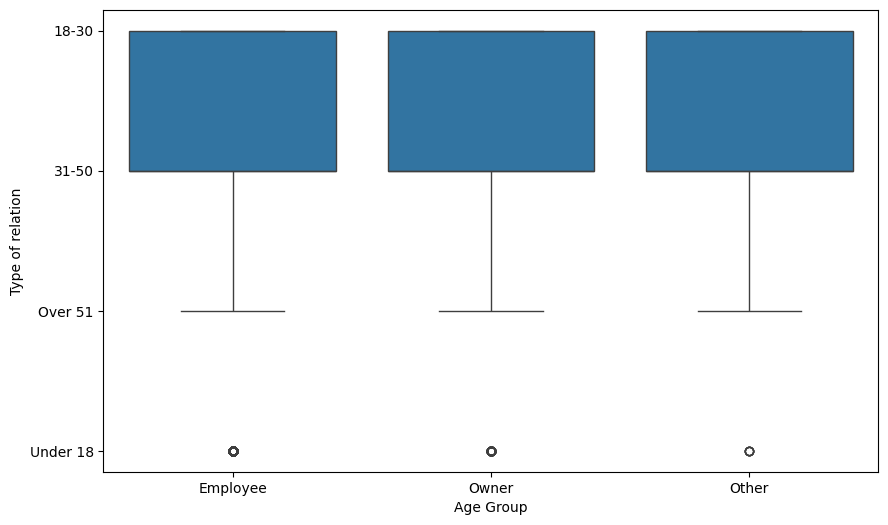

In [672]:
#Detection and Treatment of Outliers: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, 
# or use robust methods to reduce the effect of outliers, depending on the context.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle_driver_relation', y='Age_band_of_driver')
plt.xlabel('Age Group')
plt.ylabel('Type of relation')
plt.show()


In [673]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity', 'Service_year_of_vehicle_1-2yr',
       'Service_year_of_vehicle_2-5yrs', 'Service_year_of_vehicle_5-10yrs',
       'Service_year_of_vehicle_Above 10yr',
       'Service_year_of_vehicle_Below 1yr', 'Service_year_of_vehicle_nan'],
      dtype='object')

In [680]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
Index: 6874 entries, 2 to 12315
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time                                6874 non-null   object 
 1   Day_of_week                         6874 non-null   object 
 2   Age_band_of_driver                  6874 non-null   object 
 3   Sex_of_driver                       6874 non-null   object 
 4   Educational_level                   6874 non-null   object 
 5   Vehicle_driver_relation             6874 non-null   object 
 6   Driving_experience                  6874 non-null   float64
 7   Type_of_vehicle                     6874 non-null   object 
 8   Owner_of_vehicle                    6874 non-null   object 
 9   Defect_of_vehicle                   6874 non-null   object 
 10  Area_accident_occured               6874 non-null   object 
 11  Lanes_or_Medians                    6874 non-nu

In [674]:
#Feature Engineering: Enhance your dataset by creating new features and transforming existing ones. 
# This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

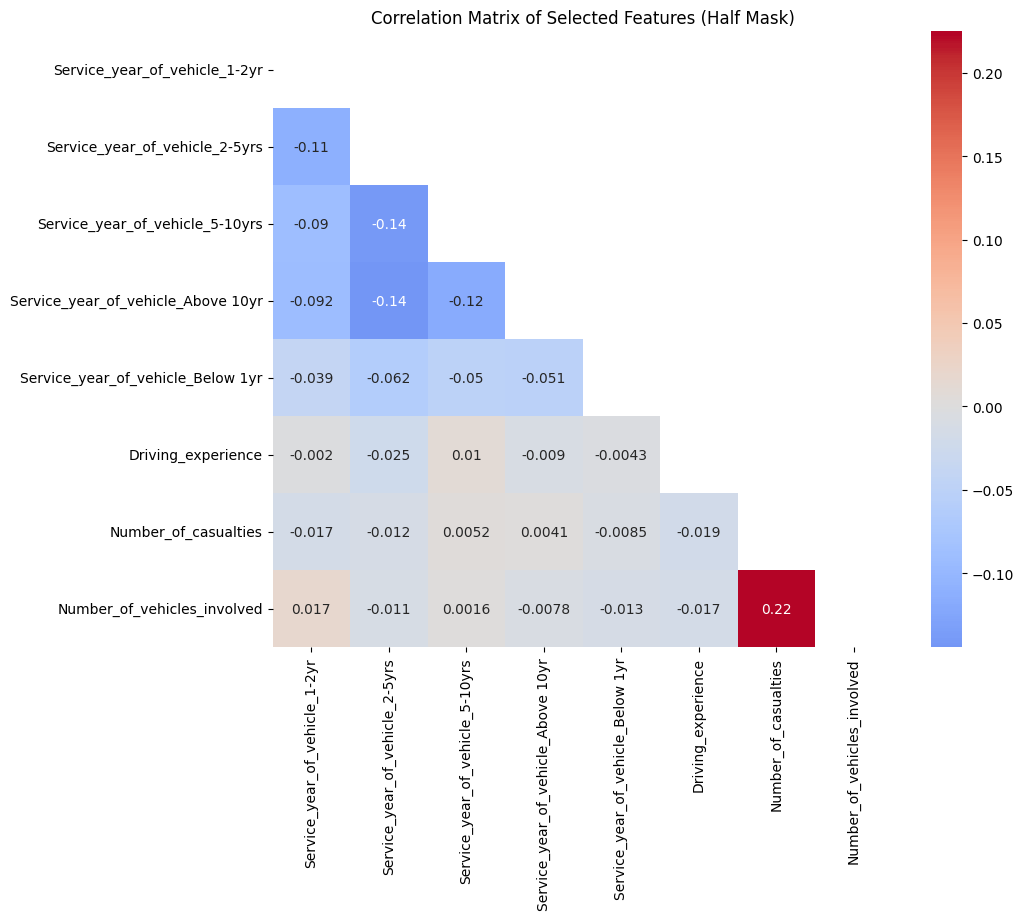

In [688]:
# Heatmap of Correlation Matrix.

selected_columns_corr =df[ ['Service_year_of_vehicle_1-2yr',
       'Service_year_of_vehicle_2-5yrs', 'Service_year_of_vehicle_5-10yrs',
       'Service_year_of_vehicle_Above 10yr',
       'Service_year_of_vehicle_Below 1yr','Driving_experience','Number_of_casualties','Number_of_vehicles_involved']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(selected_columns_corr, dtype=bool))
sns.heatmap(selected_columns_corr, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Selected Features (Half Mask)')
plt.show()

In [702]:
Time_c=df["Time"][:50]

<Axes: xlabel='Light_conditions', ylabel='Time'>

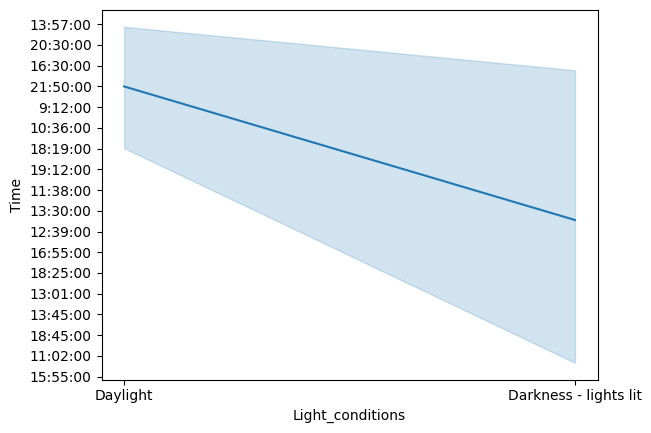

In [703]:
#Line plots.
sns.lineplot(x="Light_conditions",y=Time_c,data=df)


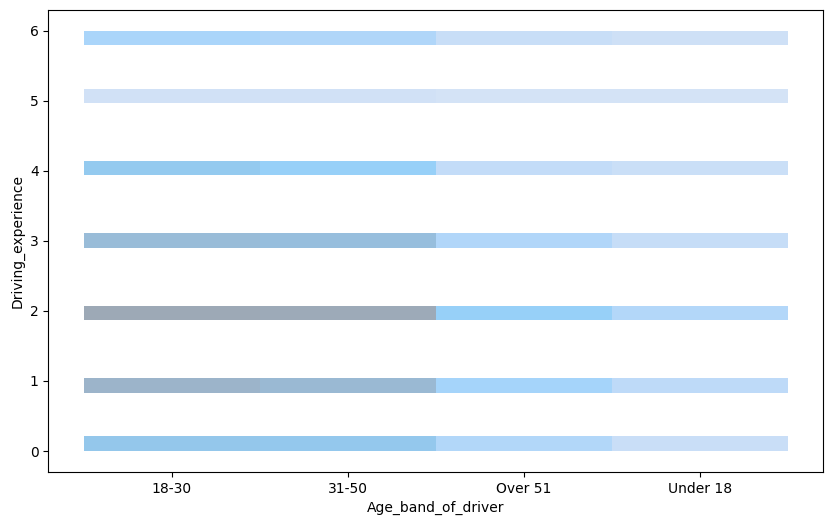

In [708]:
#Histograms plots.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_band_of_driver', y='Driving_experience', alpha=0.5)
plt.show()


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [709]:
X=df[['Service_year_of_vehicle_1-2yr',
       'Service_year_of_vehicle_2-5yrs', 'Service_year_of_vehicle_5-10yrs',
       'Service_year_of_vehicle_Above 10yr',
       'Service_year_of_vehicle_Below 1yr','Driving_experience','Number_of_casualties','Number_of_vehicles_involved']]
y=df["Accident_severity"]

In [710]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

In [735]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#### Logistic Regression

In [726]:
log_clf=LogisticRegression(solver='saga',random_state=42)
log_clf.fit(X_train,y_train)

y_pred=log_clf.predict(X_test)
acc1=accuracy_score(y_test,y_pred)
acc1

c:\Users\said\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8342220067862336

#### Decision Tree Classifier

In [730]:
tree_clf=DecisionTreeClassifier(max_depth=4,random_state=42)

tree_clf.fit(X_train,y_train)
y_pred2=tree_clf.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
acc2


0.8347067377605429

#### Support Vector Machine (SVM)

In [734]:
svm_clf =SVC(gamma="auto",random_state=42)
svm_clf.fit(X_train,y_train)
y_pred3=svm_clf.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
acc3


0.8342220067862336

#### K-Neighbors Classifier

In [736]:
knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=4)
knn_clf.fit(X_train,y_train)
y_pred4 = knn_clf.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
acc4


0.7818710615608337

In [738]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc


In [746]:
#for logistic regrresion
c_log = confusion_matrix(y_test, y_pred) 
print(c_log)
accuracy_log = accuracy_score(y_test, y_pred)
print("accurecy",accuracy_log)
precision_log = precision_score(y_test, y_pred,average="weighted")
print('precision',precision_log)
recall_log = recall_score(y_test, y_pred,average="weighted")
print("recall",recall_log)
f1_log = f1_score(y_test, y_pred,average="weighted")
print('f1',f1_log)

[[   0    0   30]
 [   0    0  312]
 [   0    0 1721]]
accurecy 0.8342220067862336
precision 0.6959263566064507
recall 0.8342220067862336
f1 0.7588245632553424


c:\Users\said\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [747]:
#for descsion tree
tree_c = confusion_matrix(y_test, y_pred2) 
print(tree_c)
accuracy_tree = accuracy_score(y_test, y_pred2)
print("accurecy",accuracy_tree)
precision_tree = precision_score(y_test, y_pred2,average="weighted")
print('precision',precision_tree)
recall_tree = recall_score(y_test, y_pred2,average="weighted")
print("recall",recall_tree)
f1_tree = f1_score(y_test, y_pred2,average="weighted")
print('f1',f1_tree)

[[   0    0   30]
 [   0    2  310]
 [   0    1 1720]]
accurecy 0.8342220067862336
precision 0.6959263566064507
recall 0.8347067377605429
f1 0.7588245632553424


c:\Users\said\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [749]:
#for svm 
#for descsion tree
svm_c = confusion_matrix(y_test, y_pred3) 
print(svm_c)
accuracy_svm = accuracy_score(y_test, y_pred3)
print("accurecy",accuracy_svm)
precision_svm = precision_score(y_test, y_pred3,average="weighted")
print('precision',precision_svm)
recall_svm = recall_score(y_test, y_pred3,average="weighted")
print("recall",recall_svm)
f1_svm = f1_score(y_test, y_pred3,average="weighted")
f1_svm

[[   0    0   30]
 [   0    0  312]
 [   0    0 1721]]
accurecy 0.8342220067862336
precision 0.6959263566064507
recall 0.8342220067862336


c:\Users\said\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7588245632553424

In [748]:
#for svm 
#for descsion tree
knn_c = confusion_matrix(y_test, y_pred4) 
print(knn_c)
accuracy_knn = accuracy_score(y_test, y_pred4)
print("accurecy",accuracy_knn)
precision_knn = precision_score(y_test, y_pred4,average="weighted")
print('precision',precision_knn)
recall_knn = recall_score(y_test, y_pred4,average="weighted")
print("recall",recall_knn)
f1_knn = f1_score(y_test, y_pred4,average="weighted")
f1_knn

[[   0    0   30]
 [   0   39  273]
 [   7  140 1574]]
accurecy 0.7818710615608337
precision 0.7325062491728769
recall 0.7818710615608337


0.7539115726920743

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: